<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li><li><span><a href="#Построим-графики-распределения,-зависимости" data-toc-modified-id="Построим-графики-распределения,-зависимости-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Построим графики распределения, зависимости</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Разобьем-выборку-на-обучающую-и-тестовую" data-toc-modified-id="Разобьем-выборку-на-обучающую-и-тестовую-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Разобьем выборку на обучающую и тестовую</a></span></li><li><span><a href="#Модель-на-исходных-данных" data-toc-modified-id="Модель-на-исходных-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Модель на исходных данных</a></span></li><li><span><a href="#создаём-случайную-матрицу" data-toc-modified-id="создаём-случайную-матрицу-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>создаём случайную матрицу</a></span></li><li><span><a href="#Модель-на-&quot;зашифрованных&quot;-данных" data-toc-modified-id="Модель-на-&quot;зашифрованных&quot;-данных-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Модель на "зашифрованных" данных</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

### Загрузка библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pprint import pprint

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Загрузка данных

In [2]:
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.read_csv("https://code.s3.yandex.net/datasets/insurance.csv")

### Изучение данных

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


### Проверка на дубликаты

Понятно, что перечень данных не позволяет утверждать, что даже запись со всеми признаками должна быть уникальная. Просто посомтрим, сколько похожих данных мы имеем

In [6]:
data.duplicated().sum()

153

### Построим графики распределения, зависимости

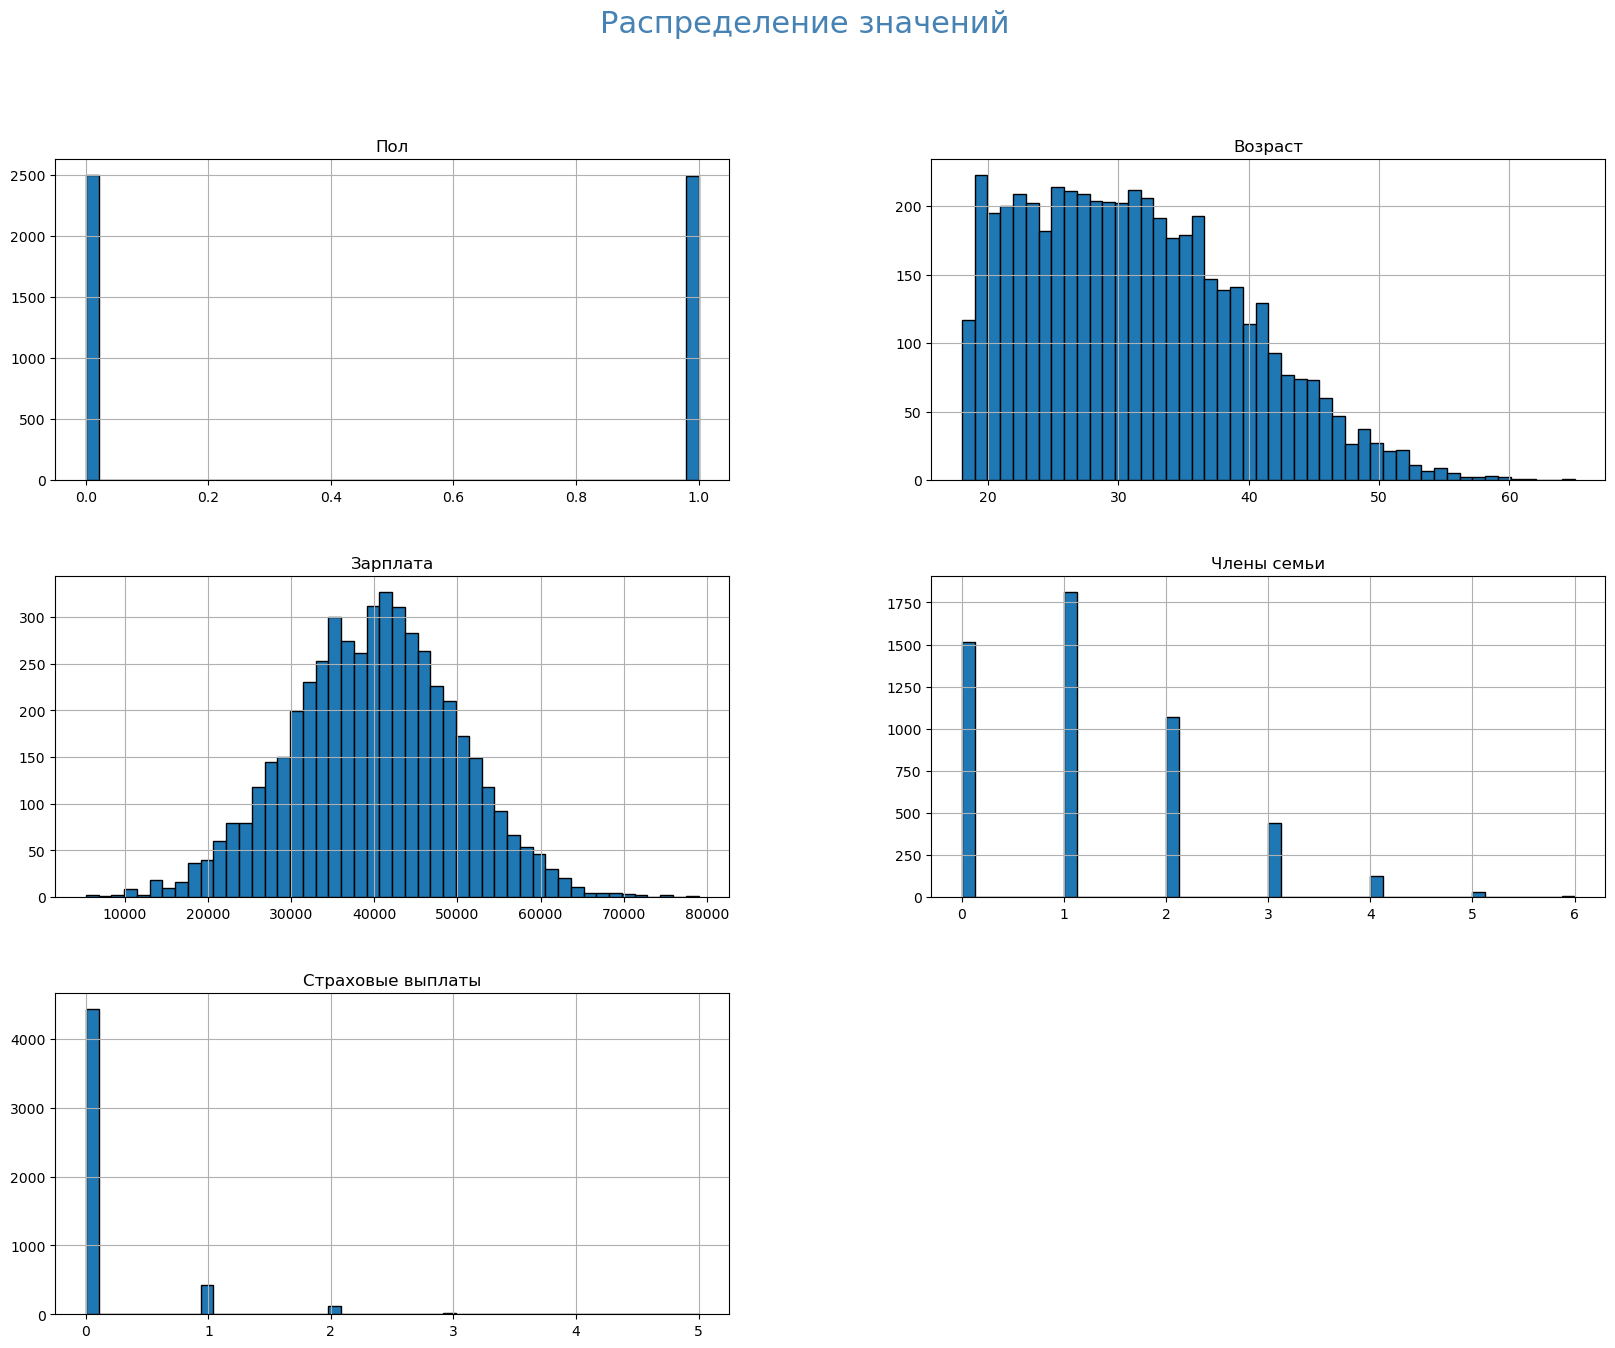

In [7]:
data.hist(bins=48, figsize=(20,15), edgecolor='black')
plt.suptitle('Распределение значений', fontsize = 22, color = 'SteelBlue')
plt.show()

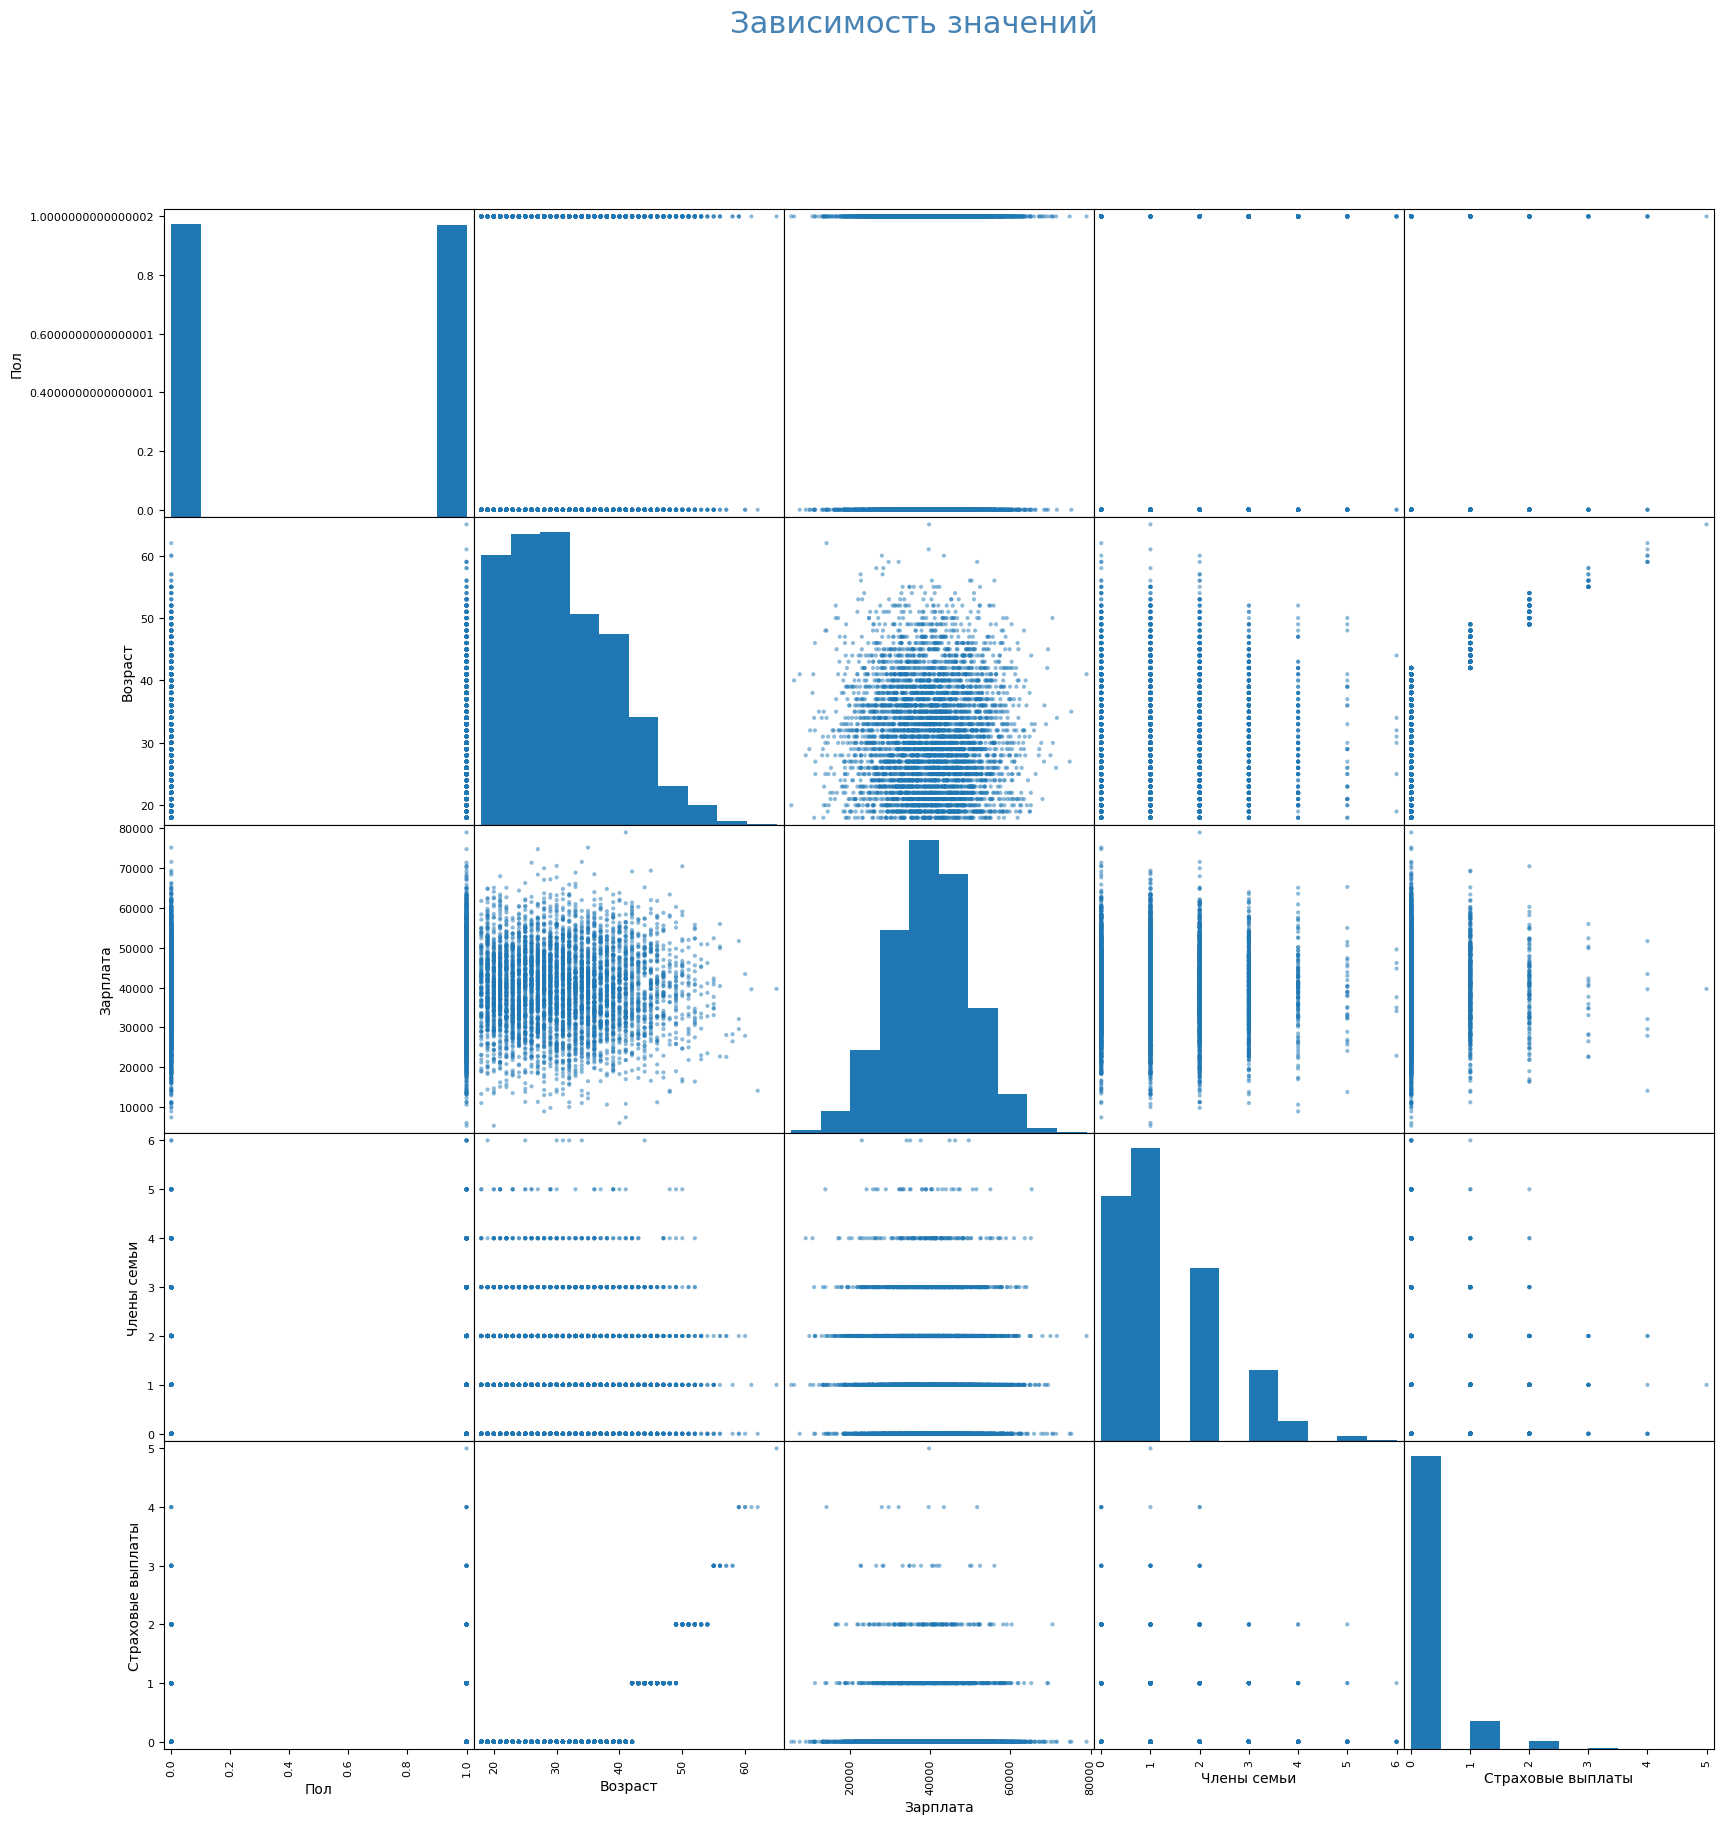

In [8]:
pd.plotting.scatter_matrix(data, figsize=(20, 20));
plt.suptitle('Зависимость значений', fontsize = 22, color = 'SteelBlue')
plt.show()

В выгруженных данных 5'000записей, имеют нужный тип, пропуски отсутствуют.  

Данные не имеют выбрасов.

- Распределение по полу примерно одинаковое  
- Возраст клиентов от 18 до 65 лет. Логично, что количество возрастных клиентов падает, график это отображает. Примерно одинаковое количество клиентов с 19 по 36 лет  
- Зарплаты клиентов от 5'300₽ до 79'000₽ - имеют стандартное распределение с пиком примерно 41'000₽
- Размер семьи клиентов составляет от 0 (без семьи) до 6 человек. Распределение скошено вправо, если оно имеет «хвост» в правой части
- Страховые выплаты (целевой признак) клиентов варьируются от 0 до 5 выплат. Почти 90% значений - 0 (выплаты не производились)


Предобработка данных не требуется

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?**

**Ответ:** Предсказания не изменятся

**Обоснование:**  
- $X$ — матрица признаков (нулевой столбец состоит из единиц)  
- $P$ — матрица, на которую умножаются признаки
 
В формулу для предсказаний подставим формулу обучения, там заменяем $X$ на $X$$P$:

~a = Xw = X((X^T X)^{-1} X^T y) = X((X^T X)^{-1} X^T y)~

~(XP)(((XP)^T (XP))^{-1} (XP)^T y) =~

~= (XP)(XP)^{-1}((XP)^T)^{-1} (XP)^T y) = XX^{-1}PP^{-1}((XP)^T)^{-1} (XP)^T y =~


~= XX^{-1}PP^{-1}(X^T)^{-1}X^T(P^T)^{-1} P^T y~

Из теории вспоминаем
![E](https://pictures.s3.yandex.net/resources/AA_1578998218.jpg)

$PP^{-1} = E$ и $(P^T)^{-1} P^T = E$

 $
 w' = ((XP)^T (XP))^{-1} (XP)^T y = 
 $

$
= (P^T X^T XP)^{-1} P^T X^T y = (P^T (X^T X)P)^{-1} P^T X^T y =
$

$
= P^{-1}(X^T X)^{-1} (P^T)^{-1} P^T X^T y = P^{-1}(X^T X)^{-1} X^T y
$

$
w' = P^{-1}(X^T X)^{-1} X^T y 
$

$
w = (X^T X)^{-1} X^T y
$

Параметры линейной регрессии в исходной задаче и в преобразованной связаны:  
 $
 w' = P^{-1}w
 $

**Предсказания:**

 $
 a' = XPw' =
 $

 $
= XPP^{-1}(X^T X)^{-1} X^T y =
 $

Убираем $E$  
$
= X(X^T X)^{-1} X^T y
$

$
a = Xw = X(X^T X)^{-1} X^T y
$

$
a' = a
$

## Алгоритм преобразования

**Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.**

**Алгоритм**

Умножение на случайную обратимую матрицу матрицу признаков

**Обоснование**

Следуя обоснованию предыдущего пункта будем использовать умножение на случайную обратимую матрицу

## Проверка алгоритма

### Разобьем выборку на обучающую и тестовую

In [9]:
X = data.drop(["Страховые выплаты"], axis=1)
y = data["Страховые выплаты"]

In [10]:
X.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


### Модель на исходных данных

In [11]:
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
r2_orig = r2_score(y, predictions)
print(f"Метрика R2 модели на исходных данных: {r2_orig}")

Метрика R2 модели на исходных данных: 0.4249455028666801


### создаём случайную матрицу

In [12]:
the_matrix = np.random.normal(size=(4, 4))

Проверка матрицы на обратимость

In [13]:
the_matrix_inv = np.linalg.inv(the_matrix)
print(the_matrix_inv)

[[-0.43614415  0.60384487 -0.42740009 -0.71971528]
 [ 0.26407319  0.29665676 -0.22989858  0.39766655]
 [-1.24678542  0.98154928 -0.12563863  0.78098957]
 [-0.41673284 -0.31150533 -0.43872414 -0.60081933]]


In [14]:
X_m = X.dot(the_matrix)

### Модель на "зашифрованных" данных

In [15]:
model_m = LinearRegression()
model_m.fit(X_m, y)
predictions_m = model_m.predict(X_m)
r2_matrix = r2_score(y, predictions_m)
print(f"Метрика R2 модели на измененных данных: {r2_matrix}")

Метрика R2 модели на измененных данных: 0.42494550286667776


Метрики качества двух моделей оказались совсем близки - это значит, что мы не повлияли на данныы и в тот же момент смогли их защитить

## Общий вывод

Мы смогли обосновать, что качество линейной регрессии не изменяется при умножении признаков на обратимую матрицу сперва в теории, выведя формулу, а потом и на практики, обучив модели на исходных данных и на модифицированных - качестро моделей r2 одинаковое